#<font color='#97171e'>AIT - Master in Data Science</font> 📈
# **Module 8: Class 1 - Part 1**
# Index
1. [Correct use of measures of location](#location)
2. [Correct use of graphs](#graphs)


## <a id="location"><font color='#97171e'>**1. Correct use of measures of location**</font></a>

There's a standard cryteria we can use to decide if a measure of location is representative of a group of data or not.


**Mean** is representative when data:
* are symmetrical
* have no outliers

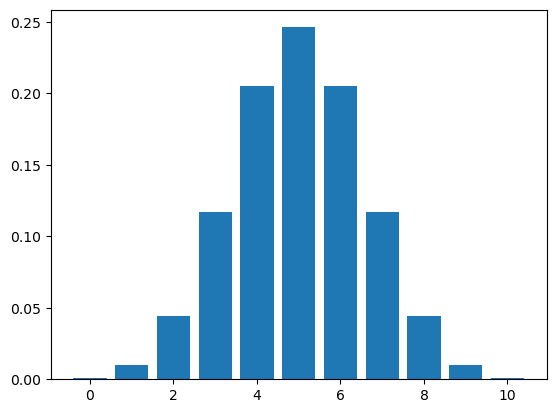

In [1]:
from scipy.stats import binom
import matplotlib.pyplot as plt
# setting the values
# of n and p
n = 10
p = 0.5
# defining list of r values
r_values = list(range(n + 1))
# list of pmf values
dist_symm = [binom.pmf(r, n, p) for r in r_values ]
# plotting the graph
plt.bar(r_values, dist_symm)
plt.show()

**Median** is used when data:
* are no symmetrical
* have outliers

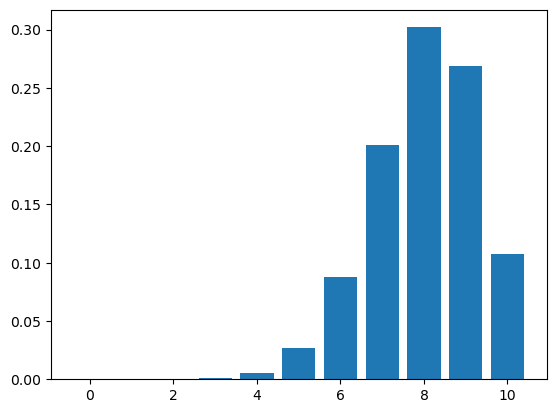

In [2]:
# setting the values
# of n and p
n = 10
p = 0.8
# defining list of r values
r_values = list(range(n + 1))
# list of pmf values
dist_no_symm = [binom.pmf(r, n, p) for r in r_values ]
# plotting the graph
plt.bar(r_values, dist_no_symm)
plt.show()

**Mode** is used when data:
* are no symmetrical
* have outliers
* <font color='#97171e'>**are no numerical**</font>

In the following sections we'll use a dataset from 2013 that has information about students from a Statistics class of [Bratislava Comenius University](https://fses.uniba.sk/en/) and their friends.

The file **responses.csv** has 1010 rows and 150 columns (139 numerical and 11 categorical). There are missing values.

To ease the job, the original variable names were changed. The original names are stored in **columns.csv**.

The original answers were in Slovak but they were translated to English.

The surveyed people were from Slovakia and they were between 15 and 30 years old.

More details can be found in the following [document](https://docs.google.com/document/d/1YI94OKNvQSRY6oiocuUVjVWLP8r9N1wc1DiqHqcHEEY/edit?usp=sharing).

### 1.1 Checking for symmetry

We are going to check analytically if a column is symmetrical or not considering their quantiles.

In [4]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', None) # que muestre todas las filas salvo que indiquemos lo contrario
pd.set_option('display.max_columns', None) # que muestre todas las columnas salvo que indiquemos lo contrario
ypeople=pd.read_csv('Files/responses.csv') # cargamos el dataset
ypeople.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

Considering the quantiles we could say that:
* Q3-Q2 ~ Q2-Q1 then symmetric
* Q3-Q2>Q2-Q1 then positive skewed
* Q3-Q2<Q2-Q1 then negative skewed


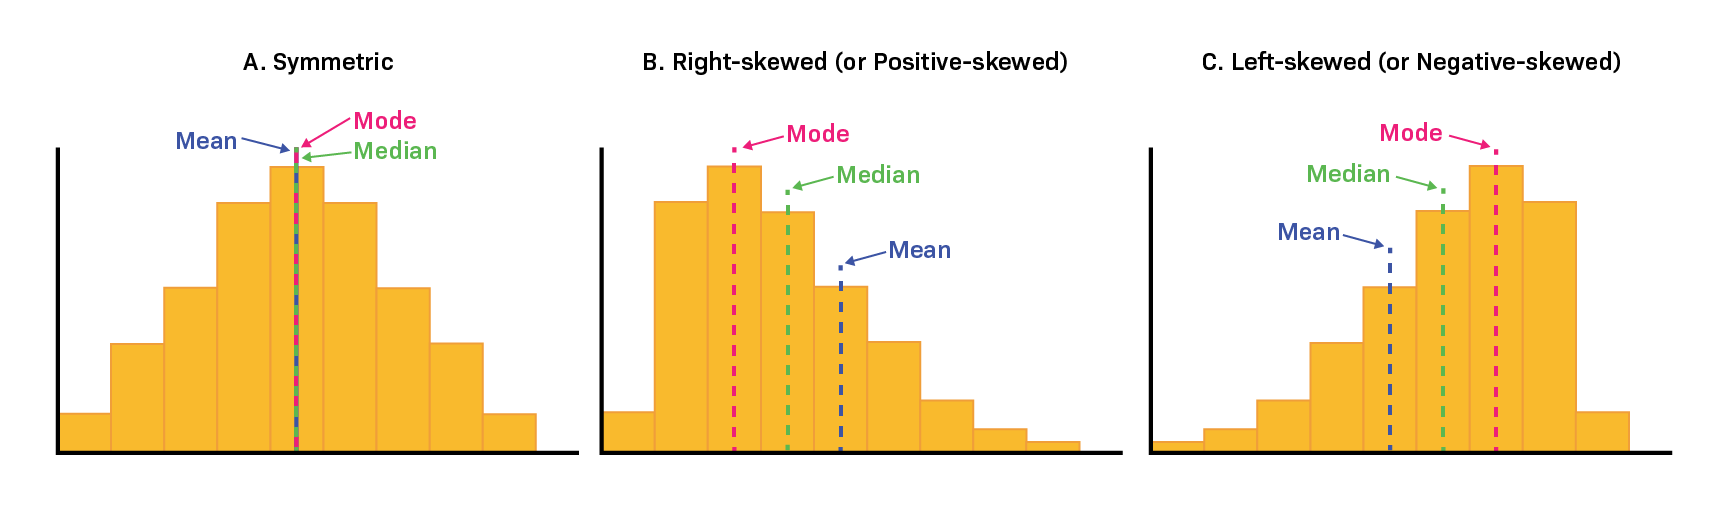
More details in the following [video](https://www.youtube.com/watch?v=41fDd1P26-s&ab_channel=ukmathsteacher) 😀

Let's define a fuction that helps us decide if a column has symmetric or positive/negative skewed data.

We are going to use [numpy docstrings](https://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_numpy.html) for documentation.

In [5]:
def check_symmetry(df, column):
  """
  It prints if the column of the dataframe df is symmetric or
  positive/negative skewed.

  Parameters
  ----------
  df: DataFrame
  column: string
  """
  df = df[[column]]
  q1=df.quantile(0.25)
  q2=df.quantile(0.5)
  q3=df.quantile(0.75)
  q3_q2 = float(q3-q2)
  q2_q1 = float(q2-q1)
  difference = q3_q2 - q2_q1

  if q3_q2 > q2_q1:
    print('Data from the column is positive skewed and the difference is',
          difference)
  elif q3_q2 < q2_q1:
    print('Data from the column is negative skewed and the difference is',
          difference)
  else:
    print('Data from the column is symmetric')

In [6]:
check_symmetry(ypeople, 'Height')

Data from the column is positive skewed and the difference is 1.0


### 1.2 Checking for outliers

We are going to consider that a value is an outlier if it's greater than q3+1.5(q3-q1) or lower than q1-1.5(q3-q1).

Let's define a function that gives as the outliers of a dataframe.

In [7]:
def check_outliers(df, cols, store=False):
    """
    La función toma un dataframe, una lista de columnas y un booleano store.
    Si store=False, solo imprime la cantidad de outliers que hay en cada columna de la lista.
    Si store=True, devuelve un diccionario que tiene como claves los nombres de las
    columnas y como valores de los índices de los outliers de cada una de ellas.

    Parameters
    ----------
    df: Dataframe
    cols: list
    store: bool

    Returns
    -------
    Si store=True:
        dict_outliers: dict
    """
    dict_outliers=dict()
    for cat in cols:
        df_cat = df[cat]
        Q1 = df_cat.quantile(0.25) # 1er cuartil
        Q3 = df_cat.quantile(0.75)# 2do cuartil
        IQR = Q3-Q1 # interquartile range
        outlier_step = IQR * 1.5
        outliers = df_cat[~((df_cat >= Q1 - outlier_step) & (df_cat <= Q3 + outlier_step))].index.tolist()
        dict_outliers[cat]=outliers
        if not store:
            print('Para la variable {} hay {} outliers'.format(cat, len(outliers)))
    if store:
        return dict_outliers

In [8]:
check_outliers(ypeople, cols=['Height'])

Para la variable Height hay 26 outliers


### 1.3 Replacing missing values

Now that we know that the column Height has outliers and is skewed, we can replace the missing values with a suitable measure.

In [9]:
# check that it has missing values
ypeople['Height'].isnull().sum()

20

Our candidates are mode and median. Let's calculate both.

In [10]:
median = ypeople['Height'].median()
mode = ypeople['Height'].mode()
print('Median:', median)
print('Mode:', mode)

Median: 173.0
Mode: 0    170.0
Name: Height, dtype: float64


We are going to use median to replace. The 0 mode value is weird, you could check that value and replace it too 😌

In [11]:
ypeople['Height'] = ypeople['Height'].fillna(median)

In [12]:
ypeople['Height'].isnull().sum()

0

## <a id="graphs"><font color='#97171e'>**2. Correct use of graphs**</font></a>

### 2.1 Bar graph
* Sirve para resumir un conjunto de datos por categorías.
* Muestra los datos usando varias barras del mismo ancho.
* Cada una de las barras representa una categoría.
* La altura de cada barra es proporcional a una agregación específica.

**Example 1**

In the following example we have a column with the count.

In [13]:
lenguaje=pd.read_csv('Files/cursos1.csv')
lenguaje

,Lenguaje,Cant Estudiantes
0,C,23
1,C++,17
2,Java,35
3,Python,29
4,PHP,12


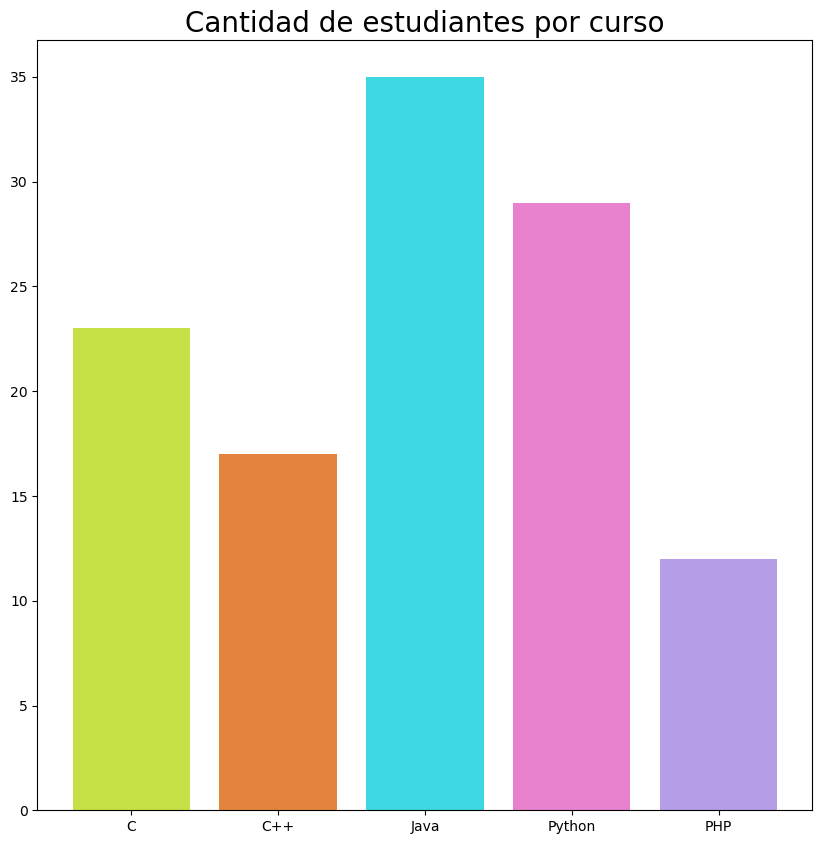

In [16]:
colors = ['#C5E146', '#E2843E', '#3ED8E2', '#E882CE', '#B69DE8'] # Opcional: elegir qué colores queremos usar
fig = plt.figure(figsize=(10, 10)) # Definimos una figura y le pasamos el tamaño
plt.bar(lenguaje['Lenguaje'], lenguaje['Cant Estudiantes'] , color=colors ,width=0.8) # Creamos el gráfico de barras
plt.title('Cantidad de estudiantes por curso',  fontsize=20) # Título, Tamaño título
plt.show() # Mostramos el gráfico

**Example 2**

In the following example we do not have a column with the count.

In [18]:
lenguaje2=pd.read_csv('Files/cursos2.csv')
lenguaje2

,ID estudiante,Lenguaje
0,1,C
1,2,C
2,3,C
3,4,C
4,5,C
5,6,C
6,7,C
7,8,C
8,9,C
9,10,C


In [19]:
leng_agrupado=lenguaje2.groupby('Lenguaje').count()
leng_agrupado.rename(columns={'ID estudiante': 'Cant Estudiantes'}, inplace=True)
leng_agrupado.reset_index(inplace=True)
leng_agrupado

,Lenguaje,Cant Estudiantes
0,C,23
1,C++,17
2,Java,35
3,PHP,12
4,Python,29


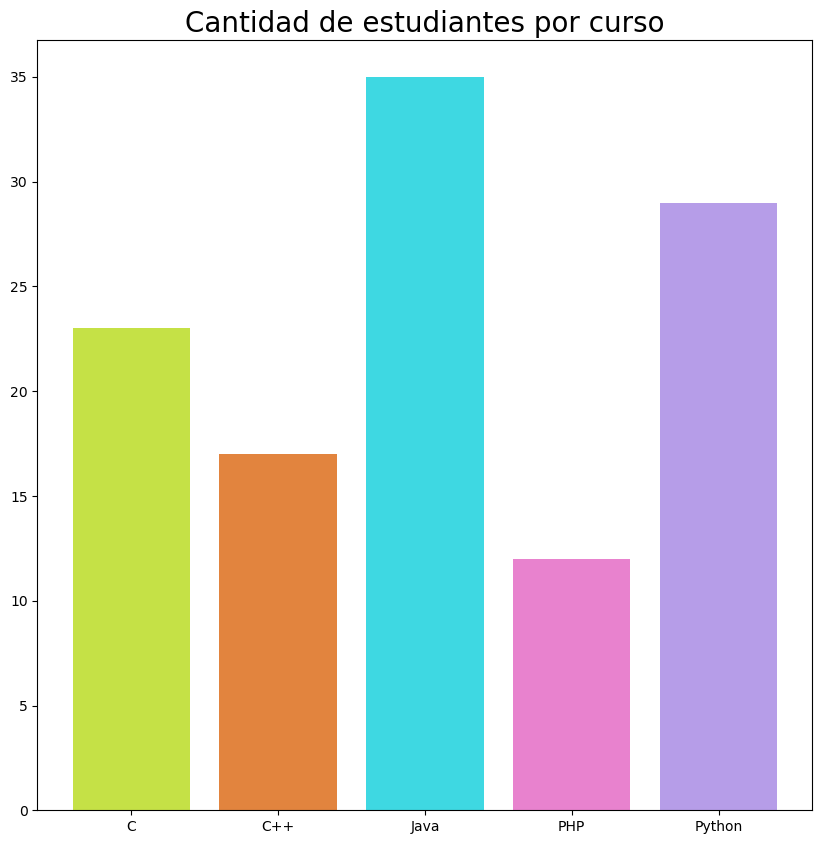

In [20]:
colors = ['#C5E146', '#E2843E', '#3ED8E2', '#E882CE', '#B69DE8'] # Opcional: elegir qué colores queremos usar
fig = plt.figure(figsize=(10, 10)) # Definimos una figura y le pasamos el tamaño
plt.bar(leng_agrupado['Lenguaje'], leng_agrupado['Cant Estudiantes'] , color=colors ,width=0.8) # Creamos el gráfico de barras
plt.title('Cantidad de estudiantes por curso',  fontsize=20) # Título, Tamaño título
plt.show() # Mostramos el gráfico

### 2.2 Histogram

* Se usa para tipos de datos continuos.
* Son buenos para grandes datasets.
* Sirve para datos agrupados.
* Cada barra representa un grupo.
* Las barras no tienen espacios entre sí.
* El área de cada barra es proporcional a la frecuencia.
* Permiten conocer fácilmente el rango de la variable considerada.
* Se pierde algo de información por estar agrupados los datos.


In [23]:
import seaborn as sns
pesos = pd.read_csv('Files/pesos.csv')

Text(0, 0.5, 'Frequency density')

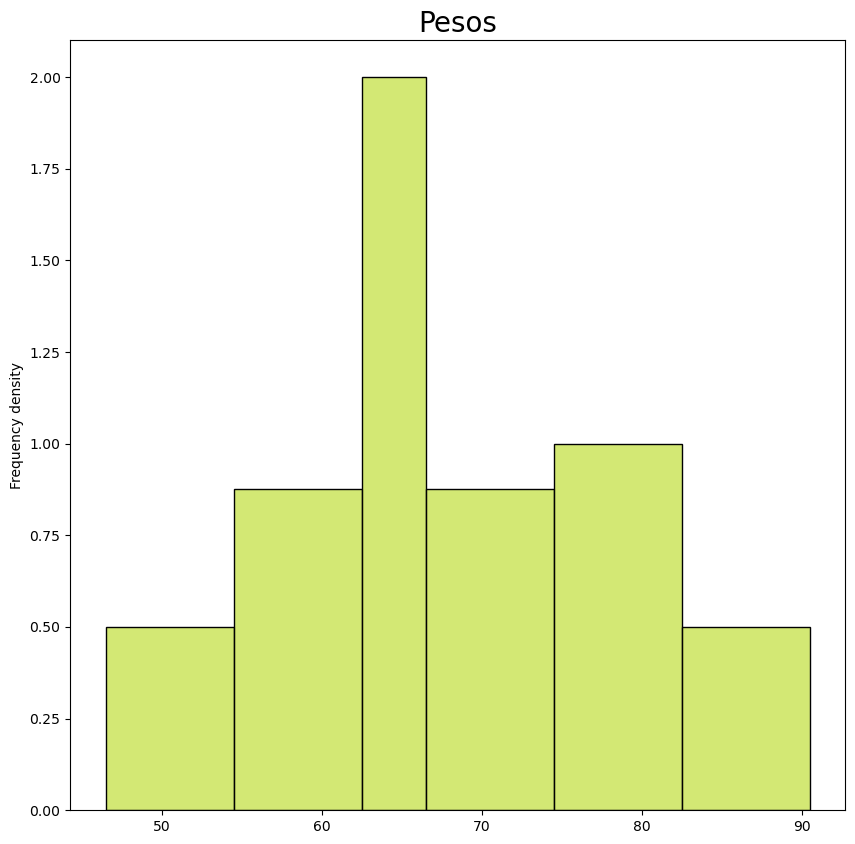

In [24]:
# Definimos los intervalos
bins=[46.5, 54.5, 62.5, 66.5, 74.5, 82.5, 90.5]
# Opcional: elegir qué color queremos usar
color = '#C5E146'
# Definimos una figura y le pasamos el tamaño
fig = plt.figure(figsize=(10, 10))
# Creamos el histograma
# stat= 'frequency' para que en el eje y esté la density frequency
sns.histplot(data=pesos, x="Peso", bins=bins, stat='frequency', color=color)
plt.title('Pesos',  fontsize=20) # Título, Tamaño título
plt.xlabel('') # Leyenda eje x
plt.ylabel('Frequency density') # Leyenda eje y

### 2.3 Box and whisker plot

* Se usa para tipos de datos continuos.
* Dan el valor máximo, mínimo y los cuartiles.
* Son útiles para comparar distintos datasets o variables.
* No se puede hallar el promedio y el desvío standard a partir de ellos.
* No preservan la información del tamaño del dataset.
* Pueden servir para detectar la presencia de outliers.

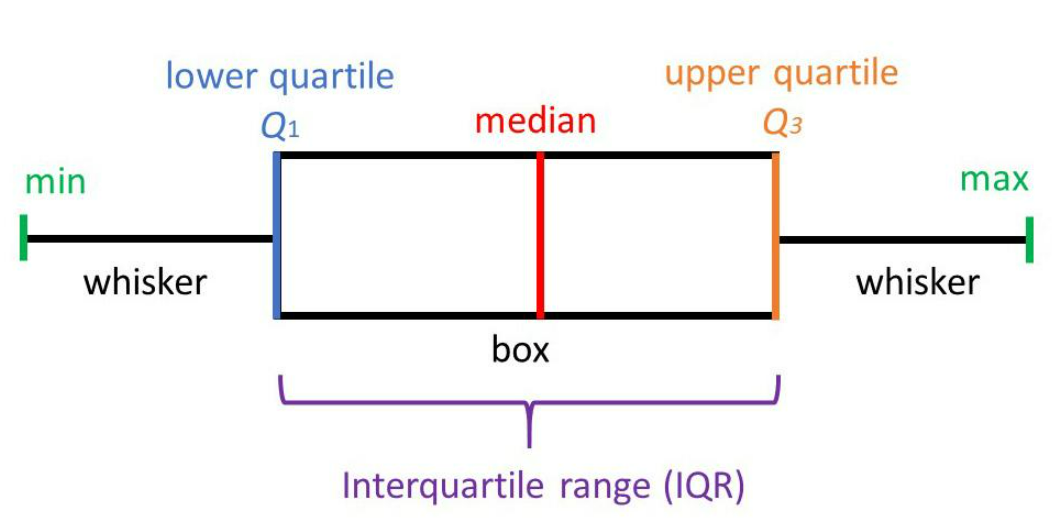


El ejemplo que vamos a utilizar está basado en un [dataset](https://www.kaggle.com/rajathmc/nyc-schoolssat-dataset?select=class_size.csv) que contiene información sobre escuelas de New York🏫

In [25]:
school_size=pd.read_csv('Files/school_size.csv')

In [26]:
school_size.shape

(1241, 2)

In [27]:
school_size.head(10) # muestra las primeras 10 filas

,SCHOOL NAME,NUM STUDENTS
0,47 The American Sign Language and English Seco...,327
1,A. Philip Randolph Campus High School,650
2,ACADEMY FOR HEALTH CAREERS,160
3,ACADEMY FOR PERSONAL LEADERSHIP AND EXCELLENCE,315
4,ACORN Community High School,928
5,ACORN High School for Social Justice,543
6,Abraham Lincoln High School,949
7,Academy for College Preparation and Career Exp...,785
8,Academy for Conservation and the Environment,342
9,Academy for Language and Technology,332


In [28]:
school_size.describe()

,NUM STUDENTS
count,1241.000000
mean,398.224819
std,236.869040
min,15.000000
25%,217.000000
50%,333.000000
75%,552.000000
max,1375.000000


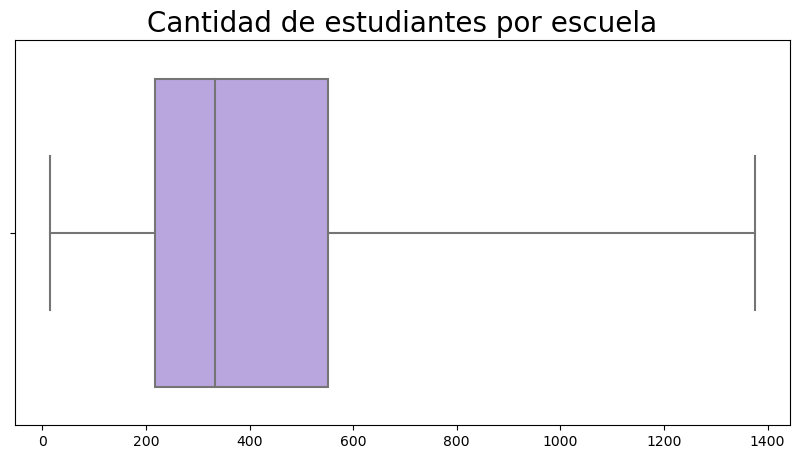

In [29]:
# Opcional: elegir qué color queremos usar
color = '#B69DE8'
# Definimos una figura y le pasamos el tamaño
fig = plt.figure(figsize=(10, 5))
# Creamos el boxplot
sns.boxplot(data=school_size, x="NUM STUDENTS", whis=6.0, color=color)
plt.title('Cantidad de estudiantes por escuela',  fontsize=20) # Título, Tamaño título
plt.xlabel('') # Leyenda eje x
plt.ylabel('') # Leyenda eje y
plt.show()

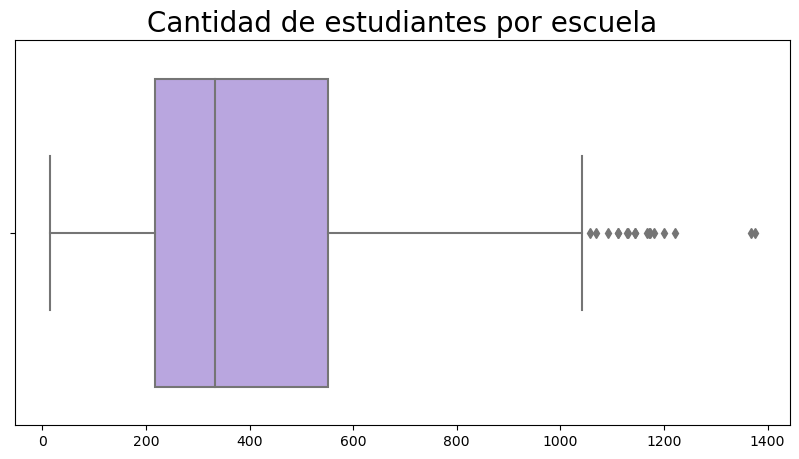

In [30]:
# Opcional: elegir qué color queremos usar
color = '#B69DE8'
# Definimos una figura y le pasamos el tamaño
fig = plt.figure(figsize=(10, 5))
# Creamos el boxplot
sns.boxplot(data=school_size, x="NUM STUDENTS", whis=1.5, color=color)
plt.title('Cantidad de estudiantes por escuela',  fontsize=20) # Título, Tamaño título
plt.xlabel('') # Leyenda eje x
plt.ylabel('') # Leyenda eje y
plt.show()

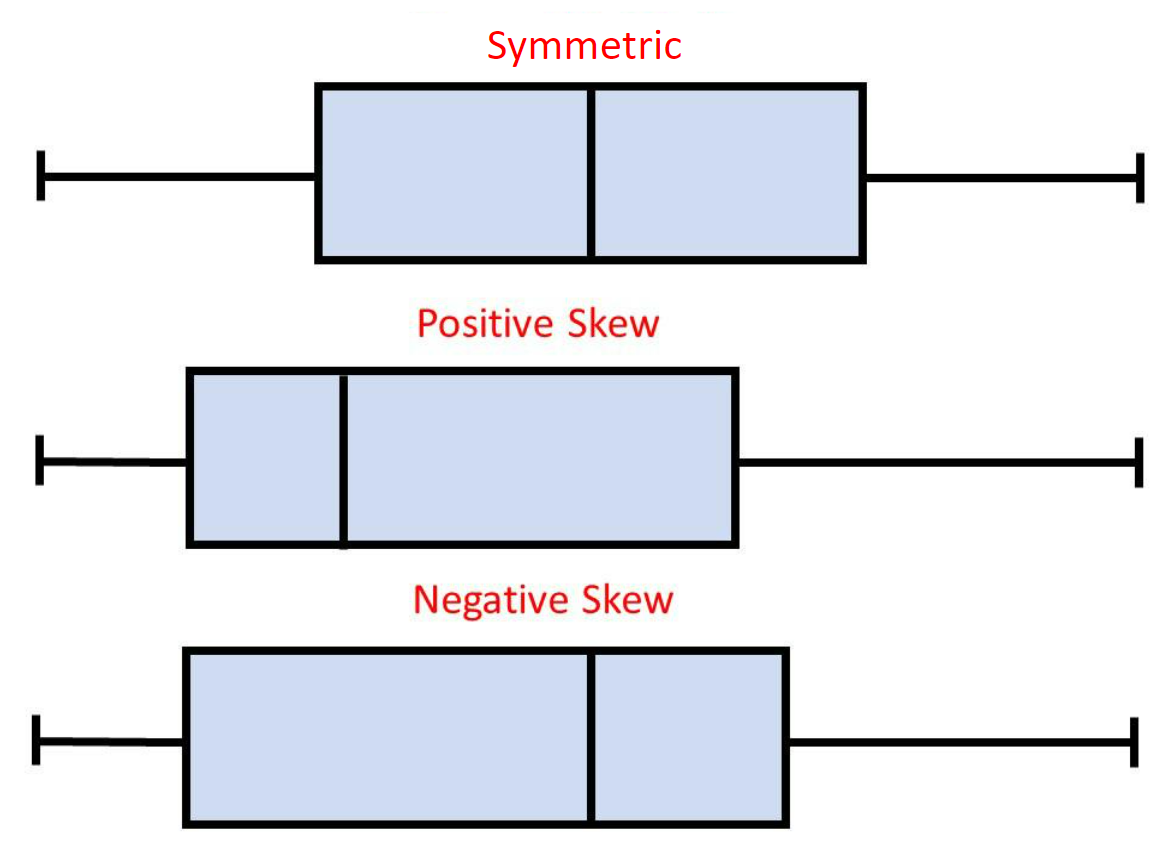

### 2.4 Scatter plot

* Se utiliza para estudiar la relación entre dos variables.
* Los datos son representados como puntos en un sistema de ejes cartesiano.
* No se puede leer a partir de ellos ninguna métrica estadística de manera directa.
* Son buenos para datasets de gran tamaño.

We are going to use a dataset that contains information about penguins.

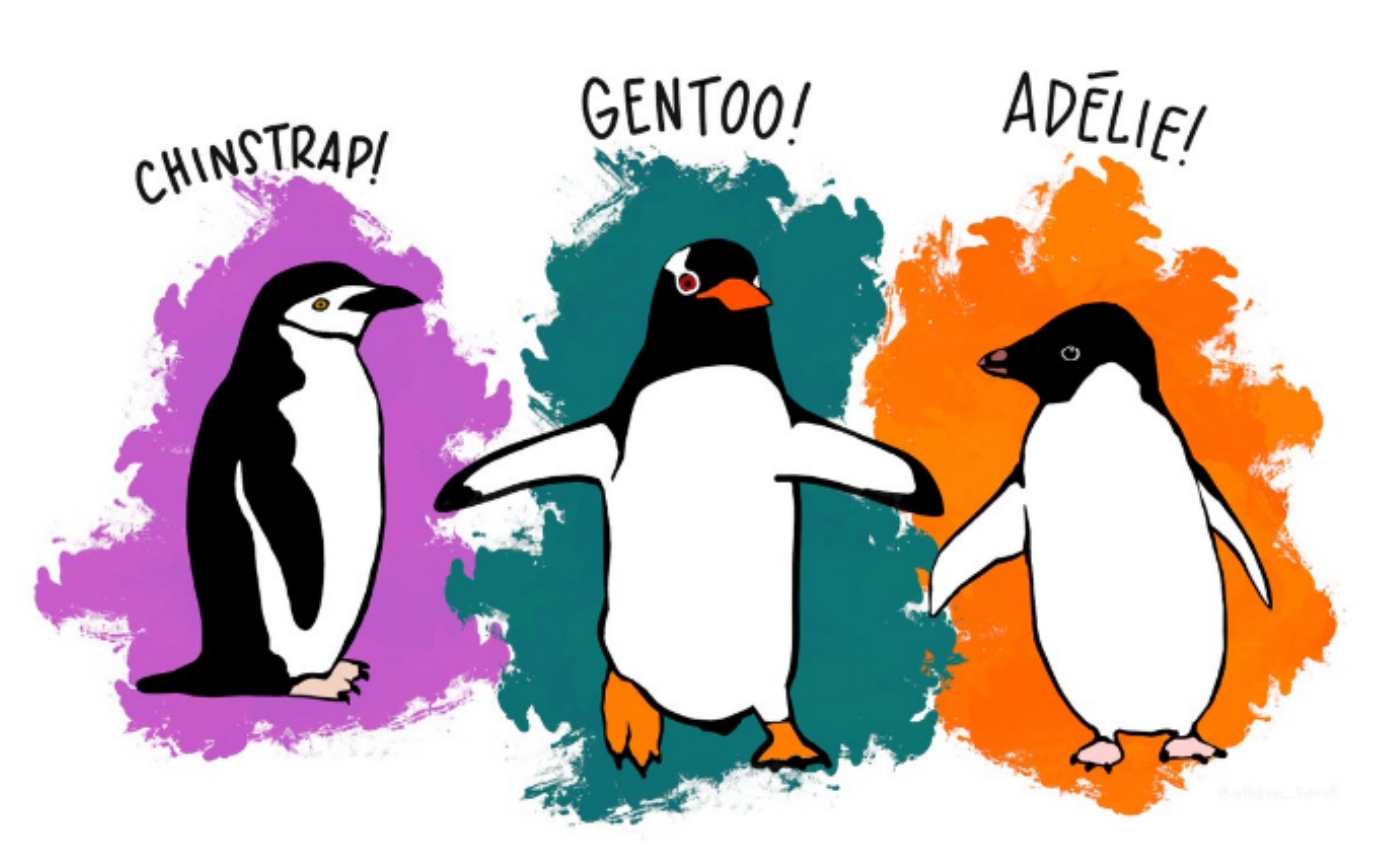

In [31]:
penguins=pd.read_csv('Files/penguinss.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


We are going to focus on Adelie species and drop na.

In [32]:
adelie=penguins[penguins['species']=='Adelie']
adelie.dropna(axis=0, inplace=True)
adelie.head()

C:\Users\Luciano Gabbanelli\AppData\Local\Temp\ipykernel_25964\2806013038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adelie.dropna(axis=0, inplace=True)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


Let's check if there's a correlation between bill length and bill depth.

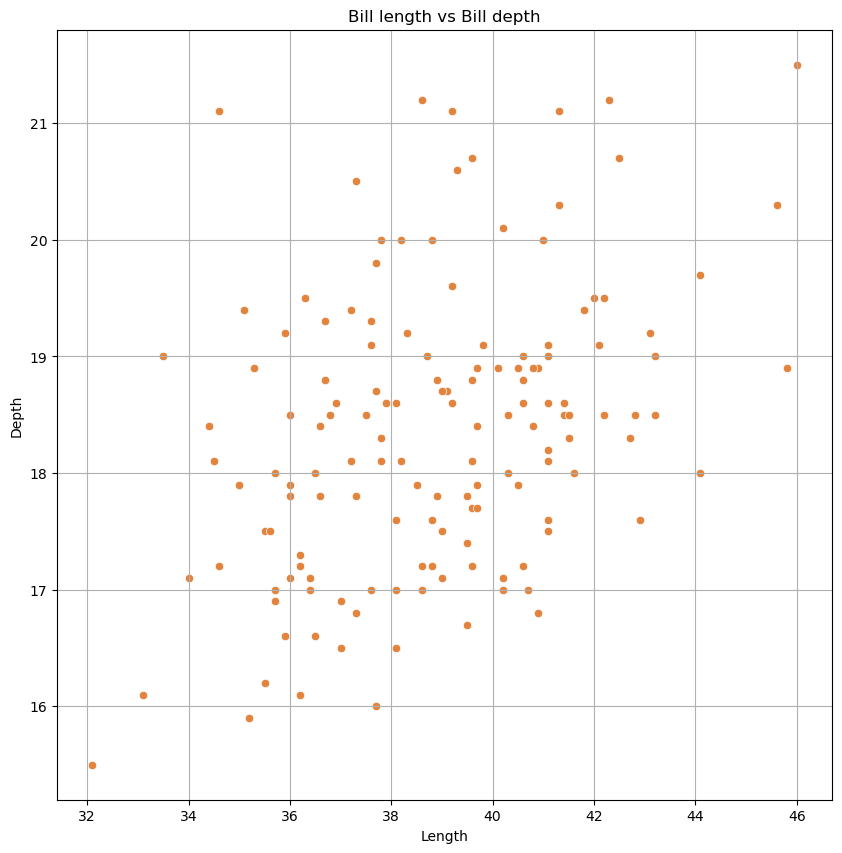

In [33]:
color='#E2843E'
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data=adelie, x='bill_length_mm', y='bill_depth_mm', color=color)
plt.title('Bill length vs Bill depth')
plt.xlabel('Length')
plt.ylabel('Depth')
plt.grid()
plt.show()